# Exercise 9.3

In [1]:
import numpy as np
from scipy import integrate
from numpy.random import normal
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
def Ito_integral(func, T, dt, N):
    """ 
    - func: function to be integrated
    - T:    final time
    - dt:   time step
    - N:    number of Monte Carlo samples
    """
    n = int(np.ceil(T / dt))
    t = np.linspace(0, T, n)

    res = np.zeros(N) 

    for j in range(N):
        for i in range(n):
            res[j] += func(t[i]) * normal(0, dt) 
    
    return res 

In [ ]:
def g1(t): return np.cos(t)
def g2(t): return np.exp(t)

T  = 2
dt = 0.1
N  = 10000

# Monte Carlo
g1_int = Ito_integral(lambda x: g1(x), T, dt, N)
g2_int = Ito_integral(lambda x: g2(x), T, dt, N)

# quasi analytical
g1_ana = integrate.quad(lambda x: np.cos(x)**2, 0, 2)[0]
g2_ana = integrate.quad(lambda x: np.exp(x), 0, 2)[0]

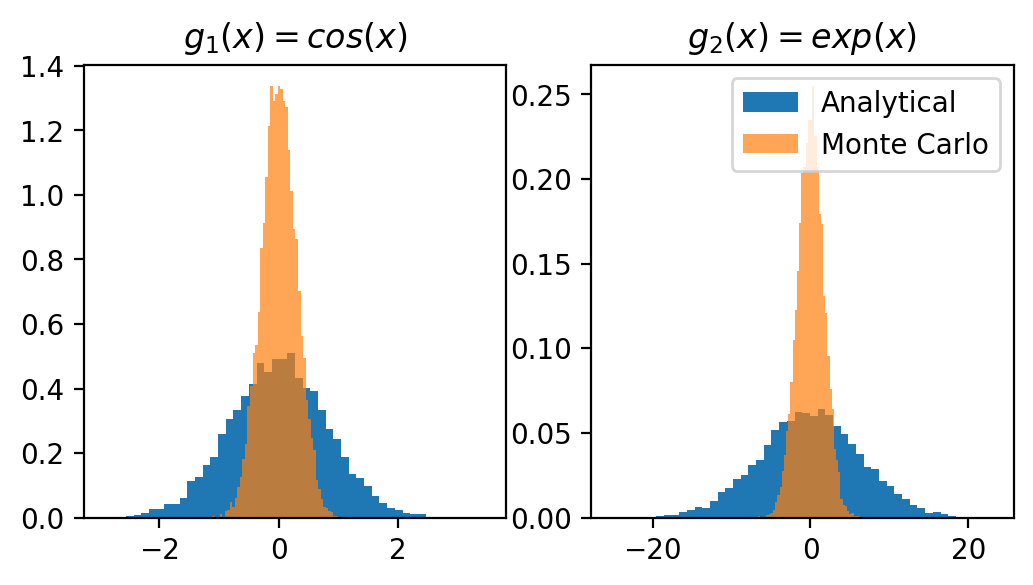

In [ ]:
fig = plt.figure(figsize=(6, 3), dpi=200)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title(r"$g_1(x) = cos(x)$")
ax1.hist(normal(0, g1_ana, N),  bins = 50, label = 'Analytical', density = True)
ax1.hist(g1_int, bins = 50, alpha=0.7, label = 'Monte Carlo', density = True)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title(r"$g_2(x) = exp(x)$")
ax2.hist(normal(0, g2_ana, N),  bins = 50, label = 'Analytical', density = True)
ax2.hist(g2_int, bins = 50, alpha=0.7, label = 'Monte Carlo', density = True)

plt.legend()
plt.show()